# Uber DataFrame
- This notebook combines multiple Market indicators into one massive DataFrame
- That DataFrame will be used for Machine Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Fetch-Data" data-toc-modified-id="Fetch-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fetch Data</a></span></li><li><span><a href="#Find-Common-Date-Span" data-toc-modified-id="Find-Common-Date-Span-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find Common Date Span</a></span></li><li><span><a href="#Visualize-the-dependencies" data-toc-modified-id="Visualize-the-dependencies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize the dependencies</a></span><ul class="toc-item"><li><span><a href="#Preview-Content" data-toc-modified-id="Preview-Content-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preview Content</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
dir="./Data/processed/"

dataset_file_name = "uber.csv"

file1 = "^DJI.csv"
file2 = "united-states.ism-manufacturing-employment.csv"
file3 = "united-states.housing-starts-mm.csv"
file4 = "united-states.ism-manufacturing-pmi.csv"


include("MarketIndicators.jl") 
println()

## Fetch Data

In [2]:
df1 = fetch_dataset( file1 , "yyyy-mm-dd", dir )

using Statistics
describe(df1)

./Data/processed/^DJI.csv


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,731206.0,724670,731206.0,737742,,,Int64
2,Date,,1985-01-29,,2020-11-13,13073,,Date
3,Value,-47.5332,-128.0,-48.0,127.0,,,Float64
4,Original,10303.0,1251.21,10198.6,29933.8,,,Float64
5,Avg005,-47.5324,-128.0,-48.4,123.8,,,Float64
6,Avg030,-47.5169,-128.0,-48.13,120.4,,,Float64
7,Avg090,-47.4788,-127.97,-47.67,116.77,,,Float64
8,Avg180,-47.4004,-127.64,-47.81,109.71,,,Float64
9,Avg365,-47.1521,-126.99,-47.86,102.24,,,Float64


In [3]:
df2 = fetch_dataset( file2 , "yyyy-mm-dd", dir )

using Statistics
describe(df2)

./Data/processed/united-states.ism-manufacturing-employment.csv


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,736452.0,735173,736452.0,737731,,,Int64
2,Date,,2013-11-01,,2020-11-02,2559,,Date
3,Value,64.2564,-128.0,69.0,127.0,,,Float64
4,Original,52.2247,27.5,52.8,60.3,,,Float64
5,Avg005,64.1569,-128.0,69.0,127.0,,,Float64
6,Avg030,63.5885,-128.0,70.33,127.0,,,Float64
7,Avg090,62.2339,-79.27,72.78,124.68,,,Float64
8,Avg180,61.0588,-36.78,70.09,114.71,,,Float64
9,Avg365,59.2222,-8.1,65.89,106.14,,,Float64


In [4]:
df3 = fetch_dataset( file3 , "yyyy-mm-dd", dir )

using Statistics
describe(df3)

./Data/processed/united-states.housing-starts-mm.csv


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,736846.0,735975,736846.0,737718,,,Int64
2,Date,,2016-01-12,,2020-10-20,1744,,Date
3,Value,11.0195,-128.0,9.0,127.0,,,Float64
4,Original,0.17328,-30.2,-0.3,25.5,,,Float64
5,Avg090,10.1343,-74.04,11.01,78.98,,,Float64
6,Avg180,9.01821,-17.92,10.025,28.67,,,Float64
7,Avg365,8.58735,-3.9,9.63,21.17,,,Float64


In [5]:
df4 = fetch_dataset( file4 , "yyyy-mm-dd", dir )

using Statistics
describe(df3)

./Data/processed/united-states.ism-manufacturing-pmi.csv


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,736846.0,735975,736846.0,737718,,,Int64
2,Date,,2016-01-12,,2020-10-20,1744,,Date
3,Value,11.0195,-128.0,9.0,127.0,,,Float64
4,Original,0.17328,-30.2,-0.3,25.5,,,Float64
5,Avg090,10.1343,-74.04,11.01,78.98,,,Float64
6,Avg180,9.01821,-17.92,10.025,28.67,,,Float64
7,Avg365,8.58735,-3.9,9.63,21.17,,,Float64


## Find Common Date Span

Example:
- for all the DataFrames
- find lowest dates
- select the highest (common) of them

In [6]:
oldest_common_day = maximum([
        minimum(df1[:,1]) 
        ,minimum(df2[:,1]) 
        ,minimum(df3[:,1])
        ,minimum(df4[:,1])
        ])
#735975


735975

In [7]:
newest_common_day = minimum([
        maximum(df1[:,1])
        , maximum(df2[:,1])
        , maximum(df3[:,1])
        , maximum(df4[:,1])
        ])
#737718

737718

In [8]:
df1_min_id = find_day(df1, oldest_common_day)
df1_max_id = find_day(df1, newest_common_day)
df1_rows_range = df1_min_id:df1_max_id

11306:13049

In [9]:
df2_min_id = find_day(df2, oldest_common_day)
df2_max_id = find_day(df2, newest_common_day)
df2_rows_range = df2_min_id:df2_max_id

803:2546

In [10]:
df3_min_id = find_day(df3, oldest_common_day)
df3_max_id = find_day(df3, newest_common_day)
df3_rows_range = df3_min_id:df3_max_id

1:1744

In [11]:
df4_min_id = find_day(df4, oldest_common_day)
df4_max_id = find_day(df4, newest_common_day)
df4_rows_range = df4_min_id:df4_max_id

3240:4983

In [12]:
using DataFrames
uber_df = DataFrame(  Day                   = df1[df1_rows_range,1] 
                     ,Date                  = df1[df1_rows_range,2] 
                     ,DJIA_Value            = df1[df1_rows_range,3] 
                     ,DJIA_Original         = df1[df1_rows_range,4] 
                     ,DJIA_Avg005           = df1[df1_rows_range,5] 
                     ,DJIA_Avg030           = df1[df1_rows_range,6] 
                     ,DJIA_Avg090           = df1[df1_rows_range,7] 
                     ,DJIA_Avg180           = df1[df1_rows_range,8] 
                     ,DJIA_Avg365           = df1[df1_rows_range,9] 
    
                     ,ISM_MFC_EMP_Value     = df2[df2_rows_range,3]
                     ,ISM_MFC_EMP_Original  = df2[df2_rows_range,4] 
                     ,ISM_MFC_EMP_Avg090    = df2[df2_rows_range,7] 
                     ,ISM_MFC_EMP_Avg180    = df2[df2_rows_range,8] 
                     ,ISM_MFC_EMP_Avg365    = df2[df2_rows_range,9]
    
                     ,HOUSE_SRT_MM_Value    = df3[df3_rows_range,3]
                     ,HOUSE_SRT_MM_Original = df3[df3_rows_range,4] 
                     ,HOUSE_SRT_MM_Avg090   = df3[df3_rows_range,5] 
                     ,HOUSE_SRT_MM_Avg180   = df3[df3_rows_range,6] 
                     ,HOUSE_SRT_MM_Avg365   = df3[df3_rows_range,7]
    
                     ,MFC_MPI_Value    = df4[df4_rows_range,3]
                     ,MFC_MPI_Original = df4[df4_rows_range,4] 
                     ,MFC_MPI_Avg090   = df4[df4_rows_range,5] 
                     ,MFC_MPI_Avg180   = df4[df4_rows_range,6] 
                     ,MFC_MPI_Avg365   = df4[df4_rows_range,7]
                   )

using Statistics
describe(uber_df)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,Day,736846.0,735975,736846.0,737718,,
2,Date,,2016-01-12,,2020-10-20,1744,
3,DJIA_Value,69.9708,2.0,80.0,124.0,,
4,DJIA_Original,23520.4,15897.8,24614.3,29568.6,,
5,DJIA_Avg005,69.8472,2.8,79.6,123.2,,
6,DJIA_Avg030,69.1401,5.0,79.25,120.4,,
7,DJIA_Avg090,67.558,9.82,80.285,116.77,,
8,DJIA_Avg180,65.3392,12.16,81.985,109.71,,
9,DJIA_Avg365,61.4226,15.03,70.97,102.24,,


## Visualize the dependencies

In [13]:
columns = print_colunms(uber_df)
println()

1 Day
2 Date
3 DJIA_Value
4 DJIA_Original
5 DJIA_Avg005
6 DJIA_Avg030
7 DJIA_Avg090
8 DJIA_Avg180
9 DJIA_Avg365
10 ISM_MFC_EMP_Value
11 ISM_MFC_EMP_Original
12 ISM_MFC_EMP_Avg090
13 ISM_MFC_EMP_Avg180
14 ISM_MFC_EMP_Avg365
15 HOUSE_SRT_MM_Value
16 HOUSE_SRT_MM_Original
17 HOUSE_SRT_MM_Avg090
18 HOUSE_SRT_MM_Avg180
19 HOUSE_SRT_MM_Avg365
20 MFC_MPI_Value
21 MFC_MPI_Original
22 MFC_MPI_Avg090
23 MFC_MPI_Avg180
24 MFC_MPI_Avg365



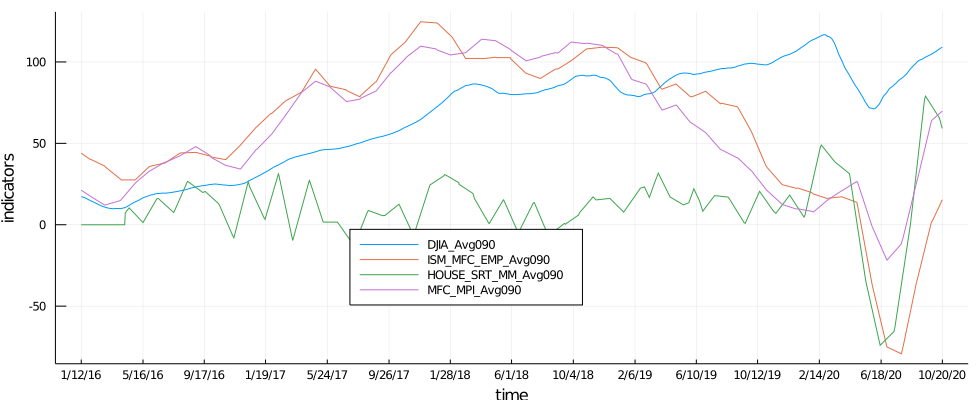

In [16]:
using Plots

record_count = size(uber_df)[1]
rows = 1:record_count
dates = format_dates( uber_df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  uber_df[rows,7] uber_df[rows,12] uber_df[rows,17] uber_df[rows,22]       ], # y-axis
    label    = [       columns[7]      columns[12]      columns[17]      columns[22]    "" ],
    legend   =:bottom, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

### Preview Content

In [15]:
save_dataset(uber_df, dataset_file_name );